In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Data\tabularData\Concrete_Data_Yeh.csv") ## data read csv file

In [3]:
data.head() ## data show first 5 rows

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.shape ## to understand rows and column

(1030, 9)

In [5]:
data.info() # information value of missing values, data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
data.isnull().sum()  ## missing values 

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


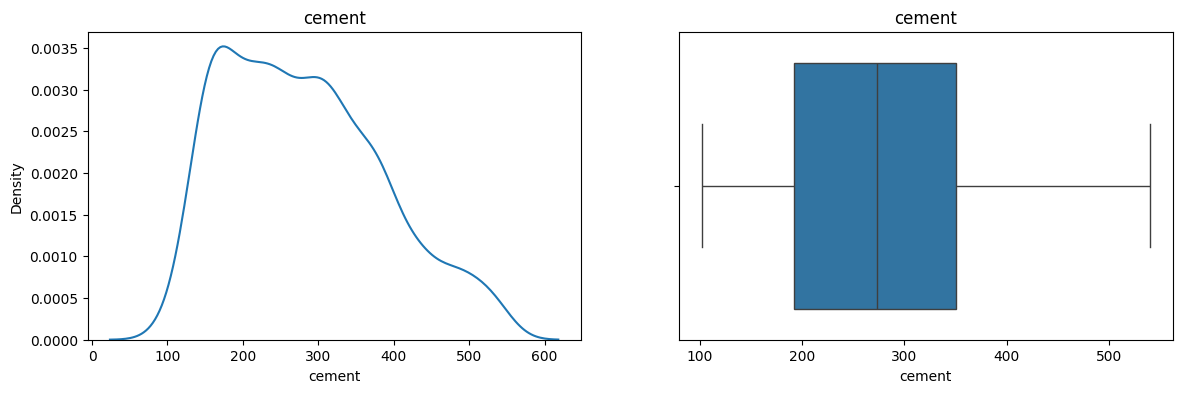

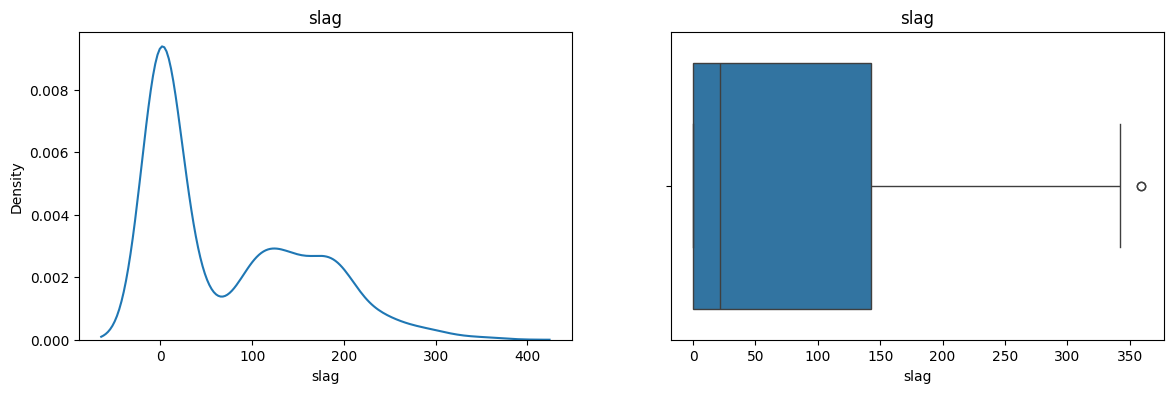

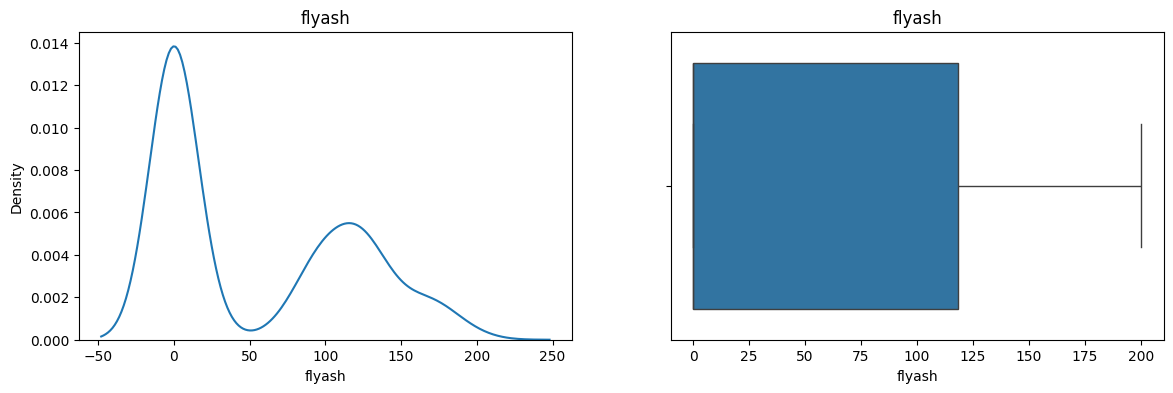

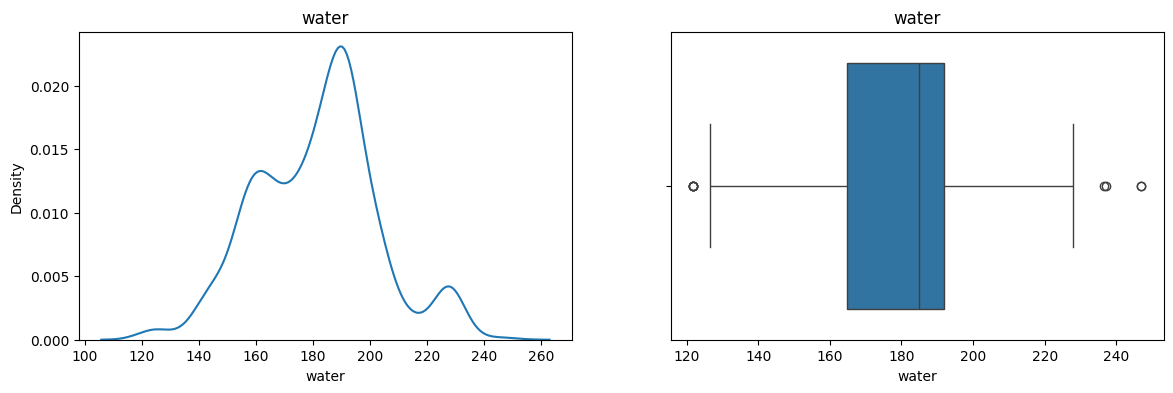

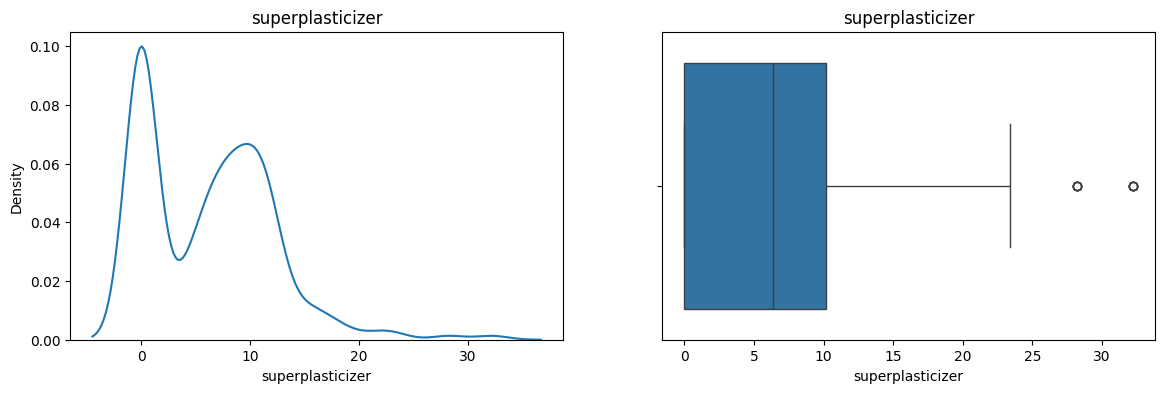

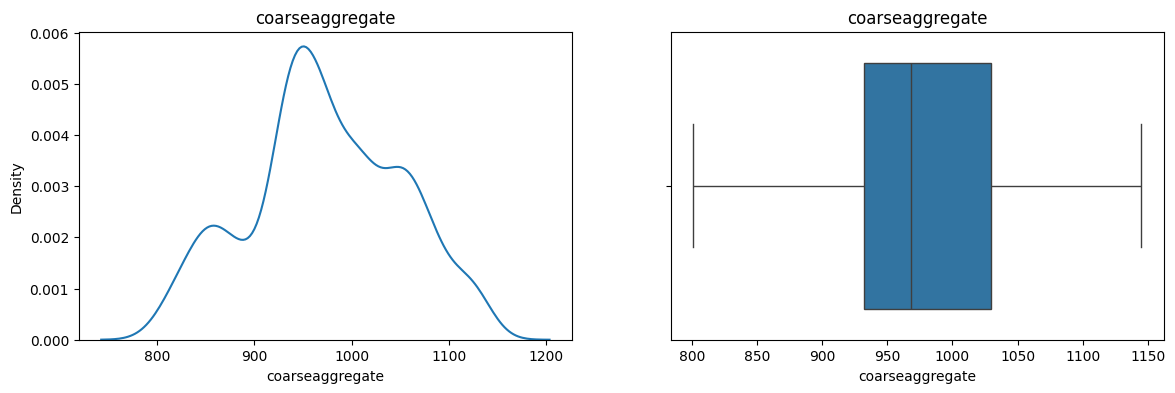

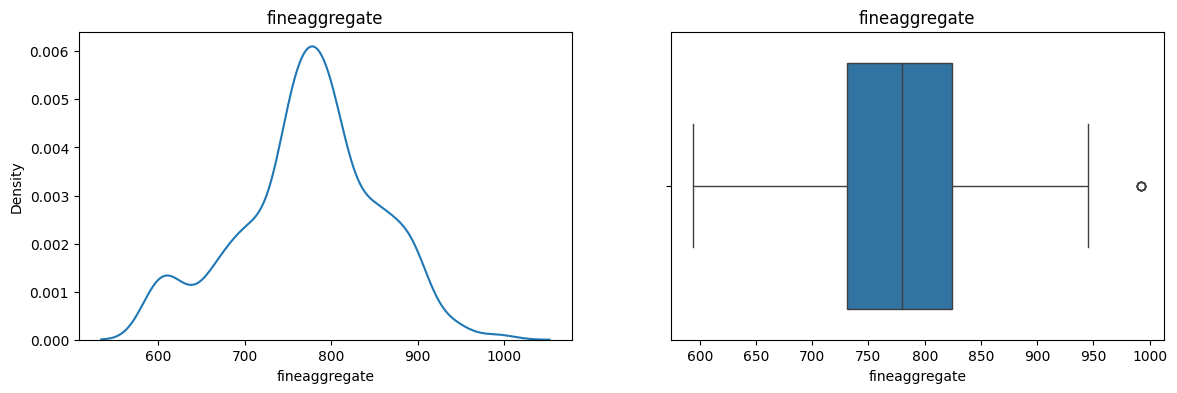

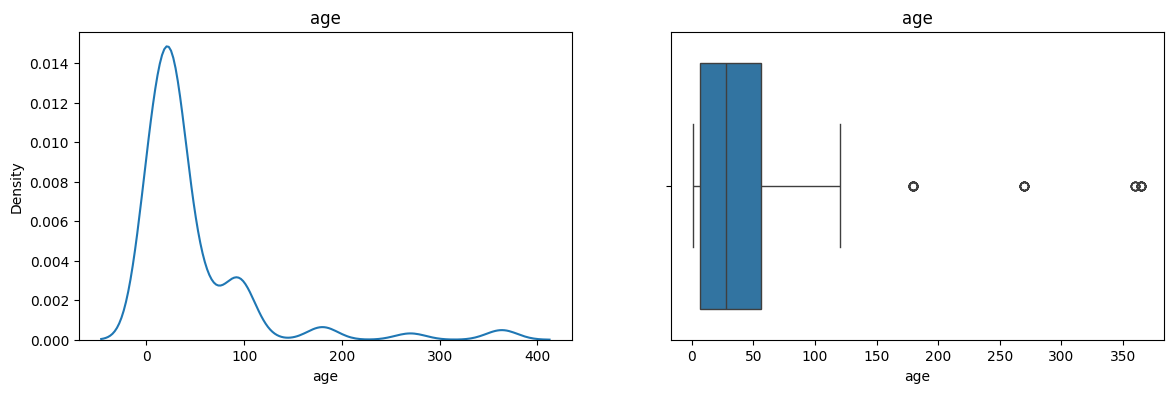

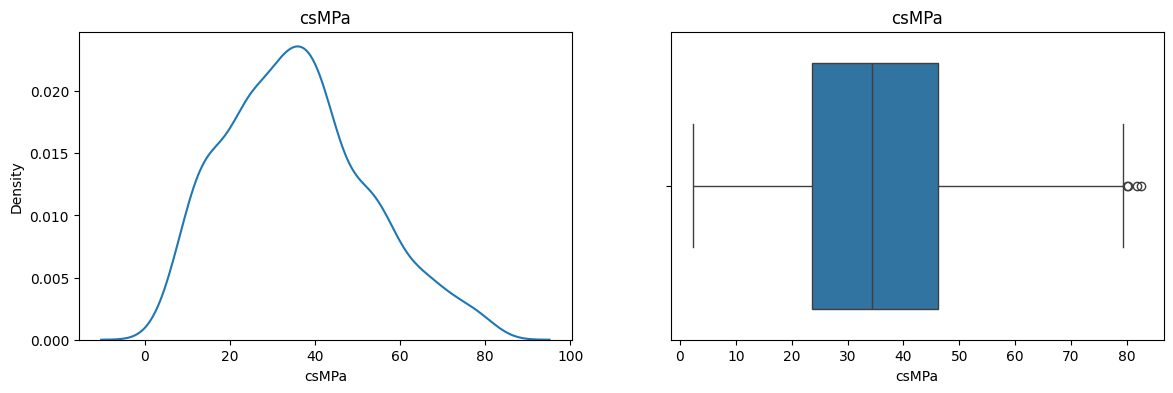

In [8]:
# see the data distributions of numeric columns histogram, box plt 
for col in data.columns:

    if data[col].dtype == 'object':
        continue

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(data=data, x = col)
    plt.title(col)

    plt.subplot(122)
    sns.boxplot(data=data, x = col, orient= 'h')
    plt.title(col)

    plt.show()

In [9]:
# features and labels split
X= data.drop('csMPa', axis=1)
Y= data['csMPa']

In [19]:
X.values[0]

array([ 540. ,    0. ,    0. ,  162. ,    2.5, 1040. ,  676. ,   28. ])

In [11]:
from sklearn.preprocessing import PowerTransformer # transform for normalizing 
scl=PowerTransformer()
datass=scl.fit_transform(X.values)

In [12]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(datass, Y, test_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression ## Model building
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
## testing test data 
pred=model.predict(X_test)

In [32]:
## Metrics performance checking
from sklearn.metrics import r2_score, root_mean_squared_error,mean_squared_error 
print("r square scre==",r2_score(y_test,pred))
print("root mean square error",root_mean_squared_error(y_test,pred))
print("mean square error===",mean_squared_error(y_test,pred))

r square scre== 0.8257276650709073
root mean square error 7.485245586219539
mean square error=== 56.02890148601909


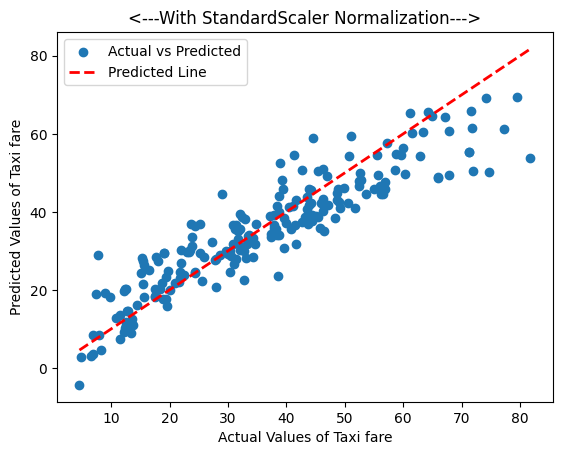

In [16]:
# checking graph for pred and actual test data 
plt.scatter(y_test, pred, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predicted Line')
plt.xlabel("Actual Values of Taxi fare")
plt.ylabel("Predicted Values of Taxi fare")
plt.title("<---With StandardScaler Normalization--->")
plt.legend()
plt.show()

In [ ]:
## custom data prediction

In [24]:
cd=datass[4]
vl=np.array(cd)
vl3=vl.reshape(-1, 1)

In [25]:
vl3

array([[-0.74499795],
       [ 0.96996966],
       [-0.90276333],
       [ 0.49697756],
       [-1.22581532],
       [ 0.06540528],
       [ 0.62901193],
       [ 2.38924064]])

In [30]:
val=scl.fit_transform([vl])

In [31]:
model.predict(val)

array([35.63172899])